In [5]:
import gograph
import similarity
import importlib
import re
import time
import annotations
import diffusion

import pandas as pd
import numpy as np
import scipy

In [6]:
pd.options.display.max_rows = 50

In [132]:
def reload_my_modules():
    """Re-import my modules into the IPython shell"""
    importlib.reload(annotations)
    importlib.reload(gograph)
    importlib.reload(similarity)
    importlib.reload(diffusion)

In [12]:
reload_my_modules()
fp = 'data/goa_human.gaf'
anno = annotations.Annotations(fp)

/home/xyz/Documents/CodeRepos/envs/ggid/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [13]:
# num proteins
print(anno.annotations.groupby('DB_Object_ID').size().count())
# num annos per protein
print(anno.annotations.groupby('DB_Object_ID').size().mean())
#
print(anno.annotations.groupby('DB_Object_ID').size().quantile([0, 0.25, 0.5, 0.75, 1]))
# total annos
print(len(anno.annotations))

19751
30.83570452129006
0.00       1.0
0.25       8.0
0.50      18.0
0.75      36.0
1.00    1100.0
dtype: float64
609036


In [15]:
anno.annotations

DB DB_Object_ID DB_Object_Symbol Qualifier       GO_ID  \
0       UniProtKB   A0A024RBG1           NUDT4B       NaN  GO:0003723   
1       UniProtKB   A0A024RBG1           NUDT4B       NaN  GO:0005829   
2       UniProtKB   A0A024RBG1           NUDT4B       NaN  GO:0046872   
3       UniProtKB   A0A024RBG1           NUDT4B       NaN  GO:0052840   
4       UniProtKB   A0A024RBG1           NUDT4B       NaN  GO:0052842   
...           ...          ...              ...       ...         ...   
609031  UniProtKB       O60488            ACSL4       NaN  GO:0001676   
609032  UniProtKB       Q9NYY3             PLK2       NaN  GO:0005814   
609033  UniProtKB       P19388           POLR2E       NaN  GO:0005666   
609034  UniProtKB       Q9H5J4           ELOVL6       NaN  GO:0009922   
609035  UniProtKB       P52739           ZNF131       NaN  GO:0006357   

          DB_Reference Evidence_Code  \
0       GO_REF:0000043           IEA   
1       GO_REF:0000052           IDA   
2       GO_REF:0000043           IEA   
3       GO_REF:0000003           IEA   
4       GO_REF:0000003           IEA   
...                ...           ...   
609031   PMID:21873635           IBA   
609032   PMID:21873635           IBA   
609033   PMID:21873635           IBA   
609034   PMID:21873635           IBA   
609035   PMID:21873635           IBA   

                                             With_or_From Aspect  \
0                                    UniProtKB-KW:KW-0694      F   
1                                                     NaN      C   
2                                    UniProtKB-KW:KW-0479      F   
3                                             EC:3.6.1.52      F   
4                                             EC:3.6.1.52      F   
...                                                   ...    ...   
609031  PANTHER:PTN000645126|SGD:S000001271|UniProtKB:...      P   
609032              PANTHER:PTN000679950|UniProtKB:Q9NYY3      C   
609033  PANTHER:PTN000056681|PomBase:SPAC23C4.15|SGD:S...      C   
609034  PANTHER:PTN000125390|TAIR:locus:2115395|FB:FBg...      F   
609035  PANTHER:PTN004702374|UniProtKB:Q9Y2Y4|MGI:MGI:...      P   

                                           DB_Object_Name  \
0       Diphosphoinositol polyphosphate phosphohydrola...   
1       Diphosphoinositol polyphosphate phosphohydrola...   
2       Diphosphoinositol polyphosphate phosphohydrola...   
3       Diphosphoinositol polyphosphate phosphohydrola...   
4       Diphosphoinositol polyphosphate phosphohydrola...   
...                                                   ...   
609031                Long-chain-fatty-acid--CoA ligase 4   
609032               Serine/threonine-protein kinase PLK2   
609033  DNA-directed RNA polymerases I, II, and III su...   
609034  Elongation of very long chain fatty acids prot...   
609035                            Zinc finger protein 131   

             DB_Object_Synonym DB_Object_Type       Taxon      Date  \
0                       NUDT4B        protein  taxon:9606  20201003   
1                       NUDT4B        protein  taxon:9606  20161204   
2                       NUDT4B        protein  taxon:9606  20201003   
3                       NUDT4B        protein  taxon:9606  20201003   
4                       NUDT4B        protein  taxon:9606  20201003   
...                        ...            ...         ...       ...   
609031  ACSL4|ACS4|FACL4|LACS4        protein  taxon:9606  20201001   
609032                PLK2|SNK        protein  taxon:9606  20181219   
609033                  POLR2E        protein  taxon:9606  20170228   
609034         ELOVL6|FACE|LCE        protein  taxon:9606  20200807   
609035                  ZNF131        protein  taxon:9606  20200219   

       Assigned_By Annotation_Extension  Gene_Product_Form_ID  
0          UniProt                  NaN                   NaN  
1              HPA                  NaN                   NaN  
2          UniProt                  NaN                   NaN 

In [16]:
reload_my_modules()
fp = 'data/go-basic.obo'
#fp = 'data/gene_ontology_edit.obo.2019-07-01'
ontology = gograph.OBOParser(fp).parse_ontology()

In [17]:
t = time.time()
ontology.make_ancestry_matrix()
print(time.time()-t)

5.624591112136841


In [18]:
ontology.ancestry_matrix.matrix.setdiag(1)

In [19]:
anno.annotations = anno.annotations.loc[anno.annotations.Aspect == 'P', :]

In [20]:
len(anno.annotations)

166320

In [23]:
importlib.reload(annotations)
ft = annotations.FrequencyTable(anno, ontology.ancestry_matrix)

In [113]:
kinases = pd.read_csv('data/list_of_human_kinases.csv')
kinases.head()

Unnamed: 0 gene_symbol gene_synonym uniprot
0           0        AKT1         AKT1  P31749
1           1        AKT2         AKT2  P31751
2           2        AKT3         AKT3  Q9Y243
3           3    CDC42BPA        MRCKA  Q5VT25
4           4    CDC42BPB        MRCKB  Q9Y5S2

(array([   0., 2374., 2116., 1893., 1508., 1230., 1138.,  968.,  757.,
         721.,  555.,  496.,  402.,  375.,  283.,  272.,  236.,  211.,
         384.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 19 Patch objects>)

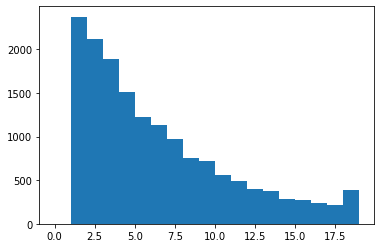

In [659]:
plt.hist([len(v) for k, v in sim.annotations2.items()], bins = range(20))

In [82]:
anno.annotations

DB DB_Object_ID DB_Object_Symbol Qualifier       GO_ID  \
5       UniProtKB   A0A075B6H7          IGKV3-7       NaN  GO:0002250   
8       UniProtKB   A0A075B6H8        IGKV1D-42       NaN  GO:0002250   
11      UniProtKB   A0A075B6H9         IGLV4-69       NaN  GO:0002250   
14      UniProtKB   A0A075B6I0         IGLV8-61       NaN  GO:0002250   
17      UniProtKB   A0A075B6I1         IGLV4-60       NaN  GO:0002250   
...           ...          ...              ...       ...         ...   
609022  UniProtKB       Q9P246            STIM2       NaN  GO:0032237   
609023  UniProtKB       P10720            PF4V1       NaN  GO:0030593   
609026  UniProtKB       Q9HAJ7           SAP30L       NaN  GO:0006355   
609031  UniProtKB       O60488            ACSL4       NaN  GO:0001676   
609035  UniProtKB       P52739           ZNF131       NaN  GO:0006357   

          DB_Reference Evidence_Code  \
5       GO_REF:0000043           IEA   
8       GO_REF:0000043           IEA   
11      GO_REF:0000043           IEA   
14      GO_REF:0000043           IEA   
17      GO_REF:0000043           IEA   
...                ...           ...   
609022   PMID:21873635           IBA   
609023   PMID:21873635           IBA   
609026   PMID:21873635           IBA   
609031   PMID:21873635           IBA   
609035   PMID:21873635           IBA   

                                             With_or_From Aspect  \
5                                    UniProtKB-KW:KW-1064      P   
8                                    UniProtKB-KW:KW-1064      P   
11                                   UniProtKB-KW:KW-1064      P   
14                                   UniProtKB-KW:KW-1064      P   
17                                   UniProtKB-KW:KW-1064      P   
...                                                   ...    ...   
609022  PANTHER:PTN001031746|FB:FBgn0045073|UniProtKB:...      P   
609023  PANTHER:PTN000021269|UniProtKB:A0A0G2KYH9|UniP...      P   
609026  PANTHER:PTN000328752|UniProtKB:Q9HAJ7|UniProtK...      P   
609031  PANTHER:PTN000645126|SGD:S000001271|UniProtKB:...      P   
609035  PANTHER:PTN004702374|UniProtKB:Q9Y2Y4|MGI:MGI:...      P   

                                           DB_Object_Name  \
5       Probable non-functional immunoglobulin kappa v...   
8       Probable non-functional immunoglobulin kappa v...   
11                    Immunoglobulin lambda variable 4-69   
14                    Immunoglobulin lambda variable 8-61   
17                    Immunoglobulin lambda variable 4-60   
...                                                   ...   
609022                     Stromal interaction molecule 2   
609023                          Platelet factor 4 variant   
609026         Histone deacetylase complex subunit SAP30L   
609031                Long-chain-fatty-acid--CoA ligase 4   
609035                            Zinc finger protein 131   

             DB_Object_Synonym DB_Object_Type       Taxon      Date  \
5                      IGKV3-7        protein  taxon:9606  20201003   
8                    IGKV1D-42        protein  taxon:9606  20201003   
11                    IGLV4-69        protein  taxon:9606  20201003   
14                    IGLV8-61        protein  taxon:9606  20201003   
17                    IGLV4-60        protein  taxon:9606  20201003   
...                        ...            ...         ...       ...   
609022          STIM2|KIAA1482        protein  taxon:9606  20170228   
609023   PF4V1|CXCL4V1|SCYB4V1        protein  taxon:9606  20200807   
609026          SAP30L|NS4ATP2        protein  taxon:9606  20200808   
609031  ACSL4|ACS4|FACL4|LACS4        protein  taxon:9606  20201001   
609035                  ZNF131        protein  taxon:9606  20200219   

       Assigned_By Annotation_Extension  Gene_Product_Form_ID  
5          UniProt                  NaN                   NaN  
8          UniProt                  NaN                   NaN  
11         UniProt                  NaN                   NaN 

In [116]:
anno_dict = dict(anno.annotations.groupby('DB_Object_Symbol')['GO_ID'].apply(list)) 

In [248]:
reload_my_modules()

sim = similarity.SimilarityCalculator(anno, ontology, ft, list(kinases.gene_symbol), namespace='P')
sim.sanitize_protein_list(min_annotations=10)
sim.calculate_similarity()

reloaded
10


In [249]:
print(len(sim.sim_matrix.raw_similarity))

327


In [250]:
sim.sim_matrix.adj_matrix = sim.sim_matrix.raw_similarity

In [226]:
abc = sim.sim_matrix.raw_similarity.tolist()
all_edges = [edge for row in abc for edge in row]
print(len(all_edges))

106929


In [227]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(x=all_edges, histnorm="probability"))

fig.show()
#sim.sim_matrix.raw_similarity[0]

In [240]:
mask = sim.sim_matrix.raw_similarity > 3.25
sim.sim_matrix.raw_similarity[~mask] = 0
#sim.sim_matrix.adj_matrix = sim.sim_matrix.raw_similarity

In [236]:
sim.sim_matrix.adj_matrix[mask] = 1

In [203]:
np.count_nonzero(sim.sim_matrix.raw_similarity)

1838

In [241]:
sim.sim_matrix.threshold_matrix(5)
print(len(sim.sim_matrix.adj_matrix.nonzero()[0]))
#sim.sim_matrix.adj_matrix.todense()

42855


In [247]:
for row in range(len(sim.sim_matrix.adj_matrix)):
    num_connections = sim.sim_matrix.adj_matrix[row,:].sum()
    if num_connections != 10:
        print(num_connections)

0.0
5.0
0.0
0.0
0.0
8.0
5.0
9.0
4.0
5.0
5.0
0.0
9.0
5.0
0.0
5.0
7.0
6.0
0.0
0.0
6.0
12.0
5.0
8.0
0.0
5.0
0.0
4.0
0.0
0.0
0.0
5.0
5.0
5.0
8.0
0.0
7.0
5.0
0.0
3.0
5.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
5.0
0.0
0.0
0.0
26.0
0.0
0.0
0.0
0.0
5.0
6.0
0.0
5.0
5.0
0.0
0.0
0.0
0.0
0.0
0.0
4.0
0.0
5.0
5.0
8.0
0.0
6.0
9.0
5.0
5.0
6.0
6.0
5.0
7.0
14.0
6.0
6.0
5.0
5.0
7.0
6.0
5.0
5.0
5.0
5.0
0.0
5.0
5.0
8.0
5.0
6.0
6.0
5.0
8.0
5.0
5.0
0.0
5.0
0.0
11.0
12.0
5.0
5.0
5.0
18.0
5.0
4.0
5.0
5.0
5.0
5.0
7.0
5.0
5.0
6.0
4.0
5.0
5.0
0.0
12.0
8.0
6.0
0.0
0.0
5.0
0.0
0.0
0.0
4.0
13.0
0.0
14.0
0.0
5.0
12.0
5.0
6.0
5.0
5.0
8.0
12.0
5.0
34.0
5.0
5.0
6.0
6.0
8.0
8.0
7.0
16.0
0.0
5.0
0.0
0.0
11.0
7.0
24.0
5.0
5.0
5.0
5.0
0.0
5.0
0.0
5.0
0.0
0.0
0.0
0.0
5.0
5.0
0.0
3.0
0.0
16.0
5.0
4.0
4.0
5.0
0.0
0.0
0.0
0.0
5.0
7.0
6.0
0.0
4.0
7.0
5.0
7.0
0.0
0.0
0.0
0.0
6.0
8.0
5.0
6.0
7.0
5.0
5.0
5.0
6.0
0.0
0.0
0.0
7.0
0.0
5.0
0.0
8.0
7.0
0.0
8.0
0.0
17.0
5.0
7.0
0.0
4.0
0.0
11.0
6.0
0.0
5.0
5.0
5.0
6.0
6.0
5.0
5.0
0.0
0.0
21.0
45.0


In [243]:
mask = sim.sim_matrix.adj_matrix.sum(axis=1) > 10
for i, flag in enumerate(mask):
    if flag:
        sim.sim_matrix.adj_matrix[i, :] = 0
        sim.sim_matrix.adj_matrix[:, i] = 0   
#sim.sim_matrix.sim_matrix[511, :] = 0

In [102]:
sim.sim_matrix.save_as_pickle('network/kinase_matrix.pkl')

In [3]:
p53_kin = ['CSNK2A1', 'CDK1', 'PRKDC', 'CDK2', 'MAPK8', 'CDK7',
           'CSNK1D', 'MAPK9', 'EIF2AK2', 'CHEK1', 'CHEK2', 'GSK3B',
           'MAPK1', 'PLK3','AURKA', 'TAF1', 'RPS6KA3', 'CDK9', 'CDK5',
           'DYRK2', 'HIPK2', 'IKBKB', 'TTK', 'AURKB', 'CSNK1A1', 'RPS6KA1']
s = ""
for p in p53_kin:
    s += p + ', '
print(s)

CSNK2A1, CDK1, PRKDC, CDK2, MAPK8, CDK7, CSNK1D, MAPK9, EIF2AK2, CHEK1, CHEK2, GSK3B, MAPK1, PLK3, AURKA, TAF1, RPS6KA3, CDK9, CDK5, DYRK2, HIPK2, IKBKB, TTK, AURKB, CSNK1A1, RPS6KA1, 


In [244]:
sim.sim_matrix.adj_matrix = sim.sim_matrix.adj_matrix + sim.sim_matrix.adj_matrix.T
sim.sim_matrix.adj_matrix[sim.sim_matrix.adj_matrix > 1] = 1 

In [106]:
sim

In [251]:
import cross_validation
import diffusion
importlib.reload(diffusion)
importlib.reload(cross_validation)

p53_kin_exist = [p for p in p53_kin if p in sim.sim_matrix.proteins]
print("not in list:", [p for p in p53_kin if p not in sim.sim_matrix.proteins])
print(p53_kin_exist)
loo = cross_validation.LOOValitation(sim.sim_matrix, p53_kin_exist)

res = loo.run_validation()
y,x, auc = loo.get_roc()

not in list: ['TAF1']
['CSNK2A1', 'CDK1', 'PRKDC', 'CDK2', 'MAPK8', 'CDK7', 'CSNK1D', 'MAPK9', 'EIF2AK2', 'CHEK1', 'CHEK2', 'GSK3B', 'MAPK1', 'PLK3', 'AURKA', 'RPS6KA3', 'CDK9', 'CDK5', 'DYRK2', 'HIPK2', 'IKBKB', 'TTK', 'AURKB', 'CSNK1A1', 'RPS6KA1']
CSNK2A1 0.02233313847424499
CDK1 0.022223618444006138
PRKDC 0.02349613581221848
CDK2 0.022435754764901557
MAPK8 0.02255272238345063
CDK7 0.021354288785439993
CSNK1D 0.022584930240315396
MAPK9 0.02229260209600977
EIF2AK2 0.02231121558441481
CHEK1 0.022967805702517823
CHEK2 0.02299572315344487
GSK3B 0.023457359066979263
MAPK1 0.022905592091543
PLK3 0.022477490110005757
AURKA 0.023129188814592423
RPS6KA3 0.021625028261753793
CDK9 0.022238958970925038
CDK5 0.022050069792700525
DYRK2 0.022234024355437733
HIPK2 0.023106171229810183
IKBKB 0.02238891206654614
TTK 0.022051335353119924
AURKB 0.023161129044996155
CSNK1A1 0.021656420596738203
RPS6KA1 0.021525788428163727
{'CSNK2A1': 0.02233313847424499, 'CDK1': 0.022223618444006138, 'PRKDC': 0.0234961

In [252]:
fig2 = go.Figure(go.Histogram(x=res.zscore))
fig2.show()

In [246]:
res.loc[res.label==1]

protein  avg_label  label    zscore
112    GSK3B   0.015486      1  4.246970
17     AURKA   0.010724      1  2.797472
18     AURKB   0.010697      1  2.789135
43      CDK1   0.010696      1  2.789057
75     DYRK2   0.010417      1  2.704068
115    HIPK2   0.005291      1  1.143536
63    CSNK1D   0.005279      1  1.140030
51      CDK5   0.005265      1  1.135699
164    MAPK1   0.005131      1  1.094933
79   EIF2AK2   0.005116      1  1.090396
174    MAPK9   0.000184      1 -0.411061
173    MAPK8   0.000169      1 -0.415520
312      TTK   0.000145      1 -0.422875
251    PRKDC   0.000142      1 -0.423697
118    IKBKB   0.000085      1 -0.441062
271  RPS6KA3   0.000000      1 -0.466938
270  RPS6KA1   0.000000      1 -0.466938
53      CDK7   0.000000      1 -0.466938
54      CDK9   0.000000      1 -0.466938
56     CHEK1   0.000000      1 -0.466938
57     CHEK2   0.000000      1 -0.466938
62   CSNK1A1   0.000000      1 -0.466938
48      CDK2   0.000000      1 -0.466938
65   CSNK2A1   0.000000      1 -0.466938
232     PLK3   0.000000      1 -0.466938

In [49]:
res['zscore'] = scipy.stats.zscore(res.avg_label)
res['rank'] = res.zscore.rank(ascending=False)
res.loc[res.label==1]

protein_name  avg_label  label    zscore  rank
45      RPS6KA1   0.010082      1  1.930414   2.0
47      RPS6KA3   0.010083      1  1.930518   1.0

In [50]:
p53_kin_exist

['RPS6KA3', 'RPS6KA1']

In [1015]:


reload_my_modules()
dif = diffusion.Diffusion(sim.sim_matrix, ['CDK1'])
res = dif.diffuse()
df = res.get_as_pandas_df_without_labels()
df.head(10)

hi


protein  initial_label  final_label    zscore  rank
16        ATR            0.0     0.002611  6.853286   1.0
41   CDC42BPB            0.0     0.002611  6.853286   2.0
32      BUB1B            0.0     0.002591  6.800015   3.0
17      AURKA            0.0     0.002544  6.675716   4.0
18      AURKB            0.0     0.002505  6.569174   5.0
42       CDC7            0.0     0.002505  6.569174   6.0
19      AURKC            0.0     0.002498  6.551417   7.0
227      PLK1            0.0     0.000026 -0.081470   8.0
48       CDK2            0.0     0.000020 -0.099227  11.0
31       BUB1            0.0     0.000020 -0.099227  11.0

In [1006]:
reload_my_modules()
dif = diffusion.Diffusion(sim.sim_matrix, ['CDK1'])
res = dif.diffuse()
df = res.get_as_pandas_df()
df['rank'] = df.final_label.rank()

df = df[df.initial_label == 0]

hi
(array([2.10443492e-10, 1.62910354e-08, 1.62960109e-08, 3.90205386e-11,
       1.62958915e-08, 1.62924315e-08, 3.97123418e-11, 1.80228095e-12,
       4.31004326e-11, 1.61252936e-08, 7.74328698e-11, 4.73753311e-11,
       1.62249974e-08, 2.59690076e-12, 6.80296350e-11, 6.93985556e-06,
       2.61084083e-03, 2.54344086e-03, 2.50475800e-03, 2.49832056e-03,
       1.61631717e-08, 1.61822590e-08, 1.57176601e-10, 1.96775709e-12,
       3.99625922e-11, 3.90425755e-11, 7.47681601e-11, 1.62503584e-08,
       6.76279714e-06, 6.72895674e-06, 8.27708637e-11, 2.04025912e-05,
       2.59042113e-03, 1.16026152e-10, 1.09800486e-10, 3.30767478e-08,
       1.63488330e-08, 3.16564709e-08, 1.67817085e-08, 1.59253829e-08,
       1.61679209e-08, 2.61105419e-03, 2.50466372e-03, 9.81756260e-01,
       1.52064928e-07, 1.20275539e-07, 1.03949516e-07, 3.30754627e-08,
       1.98379793e-05, 1.33876029e-05, 2.11311266e-10, 6.67654469e-06,
       6.84765522e-06, 1.98438945e-05, 1.84354532e-12, 1.32801740e-05,
  

AttributeError: 'DiffusionResult' object has no attribute 'get_as_pandas_df'

In [1003]:
sim.sim_matrix.protein_list.index('MAPK9')

173

In [1004]:
df['zscore'] = scipy.stats.zscore(df.final_label)
df.sort_values(by='zscore', ascending=False, inplace=True)
df.head(10)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


protein  initial_label  final_label   rank    zscore
41   CDC42BPB            0.0     0.002611  321.0  6.854682
16        ATR            0.0     0.002611  320.0  6.854109
32      BUB1B            0.0     0.002590  319.0  6.799310
17      AURKA            0.0     0.002543  318.0  6.673230
18      AURKB            0.0     0.002505  317.0  6.569418
42       CDC7            0.0     0.002505  316.0  6.569165
19      AURKC            0.0     0.002498  315.0  6.552142
227      PLK1            0.0     0.000025  314.0 -0.085672
31       BUB1            0.0     0.000020  313.0 -0.097770
65    CSNK2A2            0.0     0.000020  312.0 -0.098772

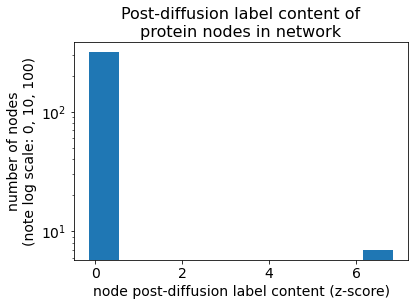

In [1005]:
#fig = plt.figure()
#plt.hist(df.final_label)
#plt.yscale('log')

fig = plt.figure()
fig.set_size_inches(6, 4)

plt.rc('font', size=14)
plt.rc('axes', titlesize=16)

plt.xlabel('node post-diffusion label content (z-score)')
plt.ylabel('number of nodes\n(note log scale: 0, 10, 100)')
plt.title('Post-diffusion label content of\nprotein nodes in network')



plt.hist(df.zscore)
plt.yscale('log')
plt.background = 'black'

plt.savefig('assets/post_diffusion_pic.png')


plt.show()

In [945]:
df['zscore']

0     -0.149308
1     -0.149308
2     -0.149308
3     -0.149308
4     -0.149308
         ...   
317   -0.149308
318   -0.149308
319   -0.149308
320   -0.149308
321   -0.149308
Name: zscore, Length: 321, dtype: float64

In [830]:
df.sort_values('rank', ascending=False)[:50]

protein  initial_label  final_label   rank
52       CDK7            1.0     1.005152  322.0
269   RPS6KA3            1.0     1.002644  321.0
173     MAPK9            1.0     1.002564  320.0
61    CSNK1A1            1.0     1.002552  319.0
268   RPS6KA1            1.0     1.000007  318.0
53       CDK9            1.0     0.997376  317.0
64    CSNK2A1            1.0     0.997326  316.0
229      PLK3            1.0     0.997222  315.0
48       CDK2            1.0     0.997173  314.0
119     IKBKB            1.0     0.994744  313.0
55      CHEK1            1.0     0.994566  312.0
79    EIF2AK2            1.0     0.991892  311.0
56      CHEK2            1.0     0.989439  310.0
43       CDK1            1.0     0.986919  309.0
172     MAPK8            1.0     0.981786  308.0
17      AURKA            1.0     0.981712  307.0
307       TTK            1.0     0.979216  306.0
116     HIPK2            1.0     0.979179  305.0
62     CSNK1D            1.0     0.974144  304.0
50       CDK5            1.0     0.966631  303.0
18      AURKB            1.0     0.964258  302.0
74      DYRK2            1.0     0.959285  301.0
113     GSK3B            1.0     0.956844  300.0
249     PRKDC            1.0     0.937933  299.0
163     MAPK1            1.0     0.899609  298.0
42       CDC7            0.0     0.012566  297.0
32      BUB1B            0.0     0.010531  296.0
136     LATS1            0.0     0.010377  295.0
16        ATR            0.0     0.010316  294.0
31       BUB1            0.0     0.007881  293.0
65    CSNK2A2            0.0     0.007813  292.0
45      CDK12            0.0     0.007801  291.0
44      CDK10            0.0     0.007758  290.0
28      BRSK1            0.0     0.007703  289.0
75      DYRK3            0.0     0.007648  288.0
63     CSNK1E            0.0     0.007641  287.0
41   CDC42BPB            0.0     0.007586  286.0
46      CDK13            0.0     0.007574  285.0
115     HIPK1            0.0     0.007439  284.0
164    MAPK10            0.0     0.005299  283.0
272   RPS6KB1            0.0     0.005281  282.0
231      PLK5            0.0     0.005207  281.0
157   MAP3K20            0.0     0.005158  280.0
294     TEX14            0.0     0.005139  279.0
35     CAMK2A            0.0     0.005133  278.0
29      BRSK2            0.0     0.005133  277.0
49       CDK4            0.0     0.005127  276.0
180     MASTL            0.0     0.005127  275.0
33      CAMK1            0.0     0.005109  274.0
10       AKT2            0.0     0.005103  273.0

In [155]:
loo.get_auc()

0.33798076923076925

In [164]:
help(sim.sim_matrix)

Help on SimilarityMatrix in module similarity object:

class SimilarityMatrix(builtins.object)
 |  SimilarityMatrix(sim_matrix, protein_list)
 |  
 |  Similairity matrix and its protein ids.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, sim_matrix, protein_list)
 |      Inits the similarity matrix container.
 |      
 |      Parameters
 |      ----------
 |      sim_matrix : numpy 2d array
 |          Matrix containing protein-protein GO term similarity scores, so that
 |          sim_matrix[i, j] contains similarity score for proteins i and j.
 |      
 |      protein_list : list[str]
 |          List of proteins in the matrix, sorted so that
 |          row (column) i in sim_matrix corresponds to protein[i].
 |  
 |  save_as_pickle(self, save_path)
 |      Pickles self to at given file path.
 |      
 |      Parameters
 |      ----------
 |      save_path : str
 |          Desired file path of the output pickle file.
 |  
 |  threshold_matrix(self, n=None)
 |      Converts s

In [179]:
len(sim.sim_matrix.adj_matrix.col)

6327

In [181]:
330 * (np.ceil(np.sqrt(330)))

6270.0

In [ ]:
#array([  6,   7,  11, ..., 332, 332, 332], dtype=int32)
#array([330, 329, 326, ..., 127, 130, 175], dtype=int32)

In [724]:
fdf = pd.read_csv('results/old_ffs_flat_matrix', delimiter='\t')

In [740]:
fdf2 = fdf.loc[fdf.score != 'None']

In [747]:
fdf2.score = fdf2.score.astype(float)

/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


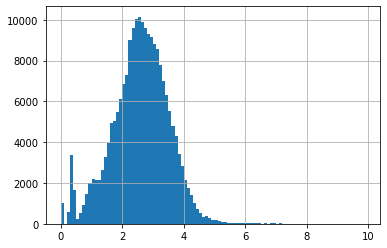

In [782]:
fdf2.score.hist(bins=np.arange(0,10,0.1))

In [787]:
print(len(fdf2.score))
print(len(fdf.score))
print(515*0.8)

209764
259081
412.0


In [756]:
a = sim.sim_matrix.sim_matrix.flatten()

89102


(0.0, 5000.0)

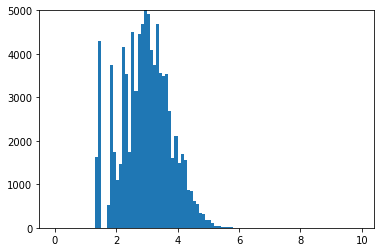

In [784]:
x = a.A1
x = list(filter(lambda a: a != 0, x))
print(len(x))
x = plt.hist(x, bins=np.arange(0,10,0.1))
plt.ylim([0,5000])

In [768]:
list(a.A1)

[0.0,
 3.6482654971149318,
 2.895342534852098,
 3.048459519758935,
 3.048459519758935,
 2.99405494218493,
 1.8412185274993118,
 2.867828018222311,
 3.048459519758935,
 4.429069745864155,
 3.6482654971149318,
 2.3243366763085453,
 3.048459519758935,
 2.2762195570058537,
 2.63688412729831,
 3.048459519758935,
 2.86329135321299,
 2.895342534852098,
 2.895342534852098,
 1.4874962046158593,
 4.118563858316296,
 2.23154595363422,
 3.6482654971149318,
 3.048459519758935,
 3.048459519758935,
 2.895342534852098,
 2.613169853197868,
 3.048459519758935,
 3.6482654971149318,
 2.99405494218493,
 2.906031362838258,
 2.895342534852098,
 1.8286895032219814,
 2.99405494218493,
 3.6482654971149318,
 2.99405494218493,
 2.99405494218493,
 2.99405494218493,
 1.9677522201842135,
 2.895342534852098,
 3.6482654971149318,
 2.3243366763085453,
 2.2977672289052244,
 2.99405494218493,
 3.048459519758935,
 2.867828018222311,
 2.906031362838258,
 2.579659365659874,
 2.371437198505814,
 2.867828018222311,
 3.6482654